In [1]:
# Let's start by importing the necessary libraries and loading the data.

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

# Load the dataset
data = pd.read_csv('../cell_drug_ABC_with_tissue.csv')

# Display the first few rows of the dataframe
data.head()


,drug,cell_line,auc_ccle,auc_gdsc,ABC,SEEDING_DENSITY,density_ccle,density_diff,Site.Primary,Histology,Hist.Subtype1,TARGET_PATHWAY
0,paclitaxel,cvcl_0218,0.504732,0.116565,0.724886,700.0,250,450.0,large_intestine,carcinoma,adenocarcinoma,Mitosis
1,paclitaxel,cvcl_0218,0.504732,0.116565,0.724886,700.0,250,450.0,large_intestine,carcinoma,adenocarcinoma,Mitosis
2,paclitaxel,cvcl_1818,0.190757,0.056999,0.690144,2000.0,250,1750.0,haematopoietic_and_lymphoid_tissue,lymphoid_neoplasm,mantle_cell_lymphoma,Mitosis
3,paclitaxel,cvcl_1818,0.190757,0.056999,0.690144,2000.0,250,1750.0,haematopoietic_and_lymphoid_tissue,lymphoid_neoplasm,mantle_cell_lymphoma,Mitosis
4,paclitaxel,cvcl_0077,0.455321,0.057515,0.625778,300.0,250,50.0,liver,carcinoma,hepatocellular_carcinoma,Mitosis


c:\Users\SerhatBeyaz\anaconda3\envs\drop2ai\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\SerhatBeyaz\anaconda3\envs\drop2ai\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\SerhatBeyaz\anaconda3\envs\drop2ai\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\SerhatBeyaz\anaconda3\envs\drop2ai\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are l

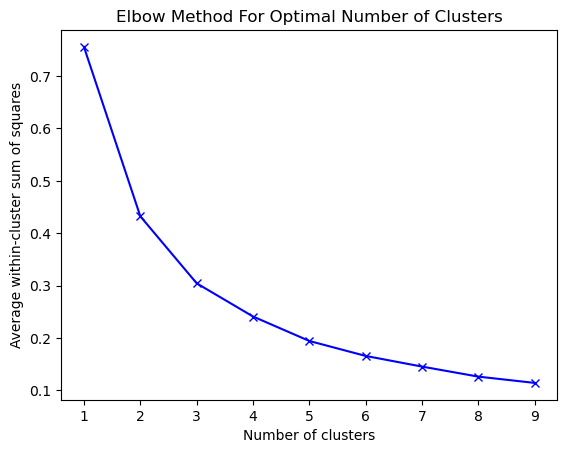

In [2]:
# Remove duplicate rows
data = data.drop_duplicates()

# Extract 'ABC' values and reshape them for clustering
ABC_values = data['ABC'].values.reshape(-1, 1)

# Standardize the 'ABC' values
scaler = StandardScaler()
ABC_values_scaled = scaler.fit_transform(ABC_values)

# Define a range for the number of clusters
clusters_range = range(1, 10)

# Fit the KMeans model for a range of clusters and compute the total within-cluster sum of squares for each number of clusters
within_cluster_sum_of_squares = []
for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(ABC_values_scaled)
    within_cluster_sum_of_squares.append(sum(np.min(cdist(ABC_values_scaled, kmeans.cluster_centers_, 'euclidean'), axis=1)) / ABC_values_scaled.shape[0])

# Plot the Elbow method graph
plt.plot(clusters_range, within_cluster_sum_of_squares, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()


In [3]:

# Extract 'ABC' values and reshape them for clustering
ABC_values = data['ABC'].values.reshape(-1, 1)

# Standardize the 'ABC' values
scaler = StandardScaler()
ABC_values_scaled = scaler.fit_transform(ABC_values)

# Perform KMeans clustering with 3 clusters (as determined earlier)
kmeans = KMeans(n_clusters=3, random_state=0).fit(ABC_values_scaled)

# Add the cluster labels to the original dataframe
data['cluster'] = kmeans.labels_

# Display the first few rows of the dataframe with the cluster labels
data.head()


c:\Users\SerhatBeyaz\anaconda3\envs\drop2ai\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\SerhatBeyaz\anaconda3\envs\drop2ai\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


,drug,cell_line,auc_ccle,auc_gdsc,ABC,SEEDING_DENSITY,density_ccle,density_diff,Site.Primary,Histology,Hist.Subtype1,TARGET_PATHWAY,cluster
0,paclitaxel,cvcl_0218,0.504732,0.116565,0.724886,700.0,250,450.0,large_intestine,carcinoma,adenocarcinoma,Mitosis,1
2,paclitaxel,cvcl_1818,0.190757,0.056999,0.690144,2000.0,250,1750.0,haematopoietic_and_lymphoid_tissue,lymphoid_neoplasm,mantle_cell_lymphoma,Mitosis,1
4,paclitaxel,cvcl_0077,0.455321,0.057515,0.625778,300.0,250,50.0,liver,carcinoma,hepatocellular_carcinoma,Mitosis,1
6,paclitaxel,cvcl_1823,0.594915,0.092776,0.595331,2500.0,250,2250.0,haematopoietic_and_lymphoid_tissue,lymphoid_neoplasm,plasma_cell_myeloma,Mitosis,1
8,plx-4720,cvcl_1694,0.687441,0.148596,0.584298,625.0,250,375.0,haematopoietic_and_lymphoid_tissue,haematopoietic_neoplasm,acute_myeloid_leukaemia,ERK MAPK signaling,1


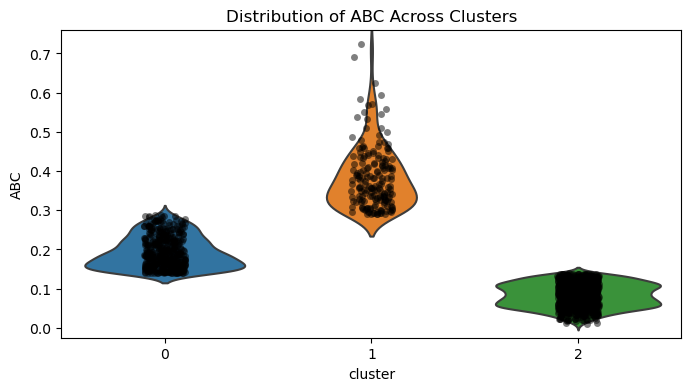

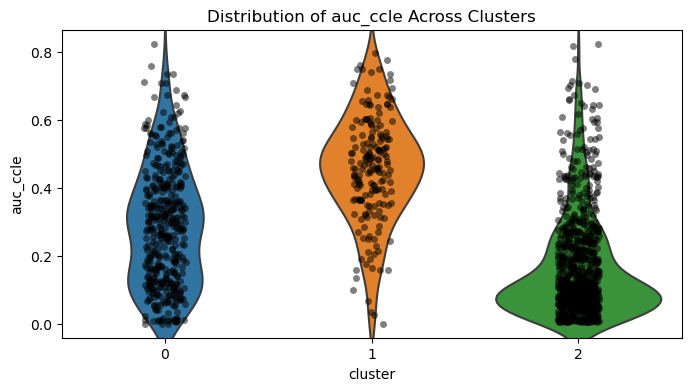

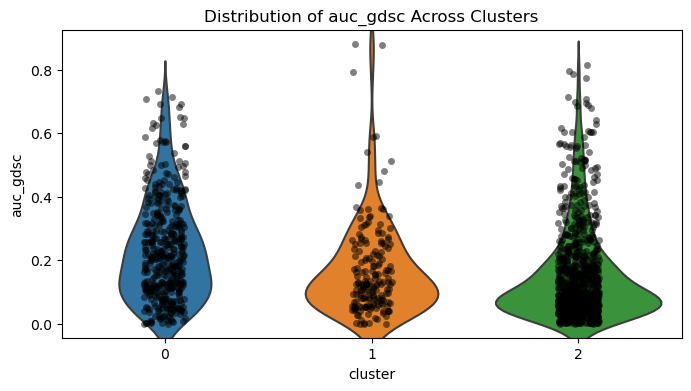

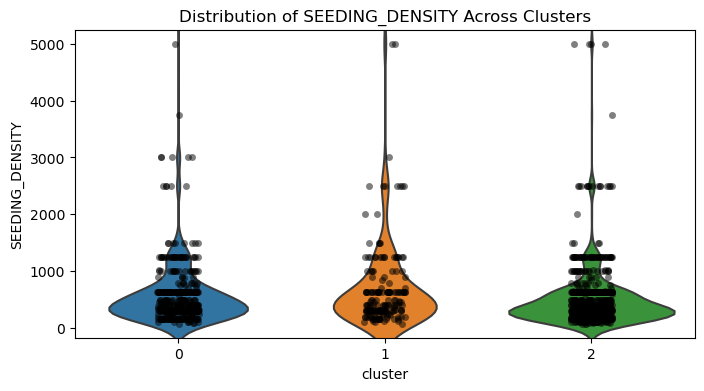

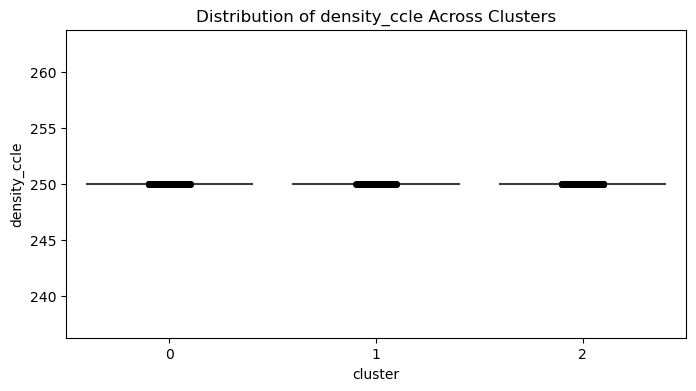

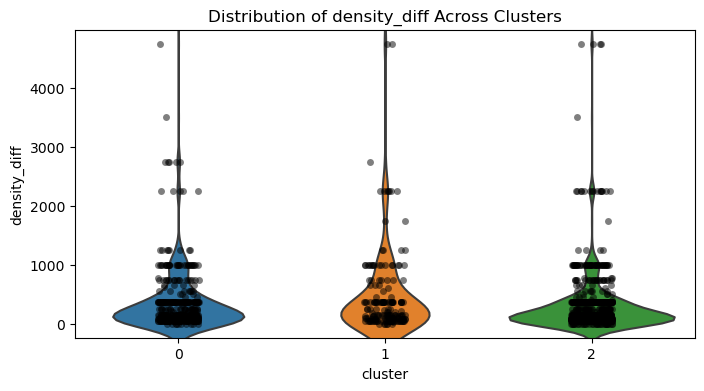

Chi-square test for variable 'drug':
Chi-square statistic: 859.7850611395821
p-value: 4.754222761421201e-166


Chi-square test for variable 'cell_line':
Chi-square statistic: 787.2138740324593
p-value: 0.015641676518476394


Chi-square test for variable 'Site.Primary':
Chi-square statistic: 62.66043389720515
p-value: 0.03355612790831582


Chi-square test for variable 'Histology':
Chi-square statistic: 56.424671029046145
p-value: 0.01632937129715405


Chi-square test for variable 'Hist.Subtype1':
Chi-square statistic: 174.0311840690337
p-value: 3.568498900423018e-06


Chi-square test for variable 'TARGET_PATHWAY':
Chi-square statistic: 368.15173631802395
p-value: 6.365395824562072e-70




In [197]:
# Import necessary libraries
import seaborn as sns
from scipy.stats import chi2_contingency

# List of continuous variables
continuous_vars = ['ABC', 'auc_ccle', 'auc_gdsc', 'SEEDING_DENSITY', 'density_ccle', 'density_diff']

# Plot violin plots with individual points for each continuous variable
for var in continuous_vars:
    plt.figure(figsize=(8, 4))
    sns.violinplot(x='cluster', y=var, data=data, inner=None) # use inner=None to remove inner boxplot
    sns.stripplot(x='cluster', y=var, data=data, color='k', alpha=0.5) # alpha is for transparency
    plt.title(f'Distribution of {var} Across Clusters')
    plt.show()

# List of categorical variables
categorical_vars = ['drug', 'cell_line', 'Site.Primary', 'Histology', 'Hist.Subtype1', 'TARGET_PATHWAY']

# Perform chi-square tests for each categorical variable
for var in categorical_vars:
    contingency_table = pd.crosstab(data['cluster'], data[var])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for variable '{var}':")
    print(f"Chi-square statistic: {chi2}")
    print(f"p-value: {p}")
    print("\n")


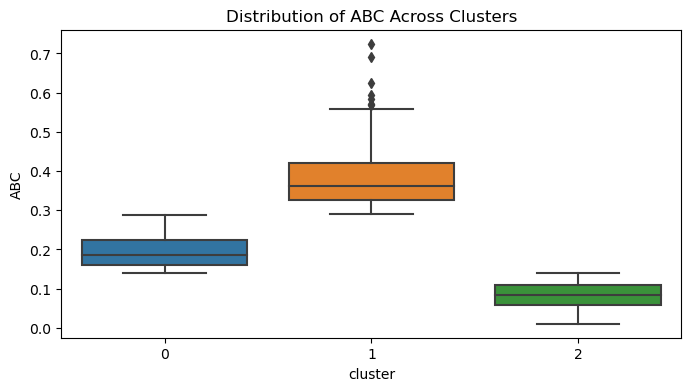

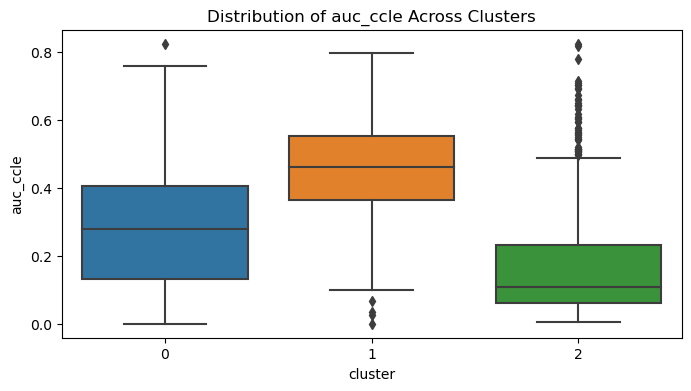

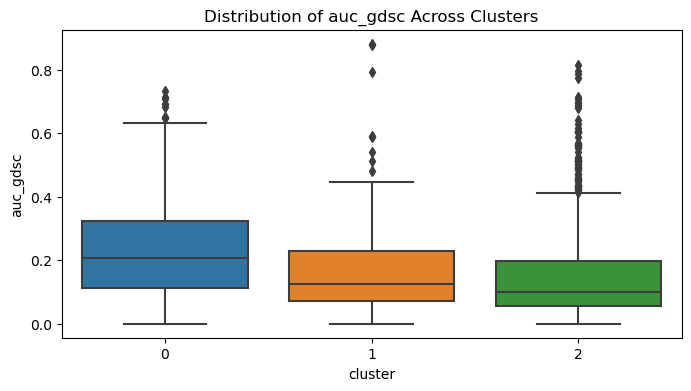

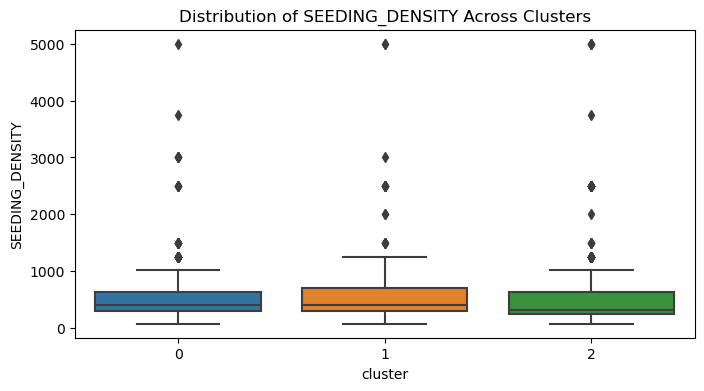

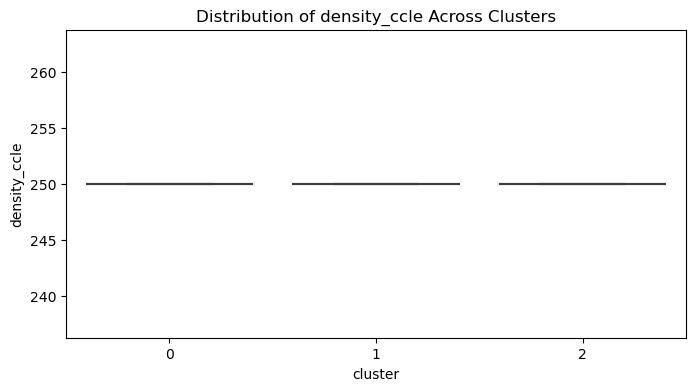

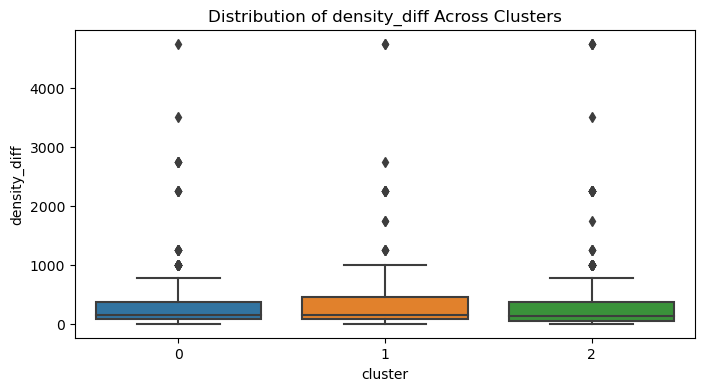

Chi-square test for variable 'drug':
Chi-square statistic: 859.7850611395821
p-value: 4.754222761421201e-166


Chi-square test for variable 'cell_line':
Chi-square statistic: 787.2138740324593
p-value: 0.015641676518476394


Chi-square test for variable 'Site.Primary':
Chi-square statistic: 62.66043389720515
p-value: 0.03355612790831582


Chi-square test for variable 'Histology':
Chi-square statistic: 56.424671029046145
p-value: 0.01632937129715405


Chi-square test for variable 'Hist.Subtype1':
Chi-square statistic: 174.0311840690337
p-value: 3.568498900423018e-06


Chi-square test for variable 'TARGET_PATHWAY':
Chi-square statistic: 368.15173631802395
p-value: 6.365395824562072e-70




In [186]:
# Import necessary libraries
import seaborn as sns
from scipy.stats import chi2_contingency

# List of continuous variables
continuous_vars = ['ABC', 'auc_ccle', 'auc_gdsc', 'SEEDING_DENSITY', 'density_ccle', 'density_diff']

# Plot boxplots for each continuous variable
for var in continuous_vars:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='cluster', y=var, data=data)
    plt.title(f'Distribution of {var} Across Clusters')
    plt.show()

# List of categorical variables
categorical_vars = ['drug', 'cell_line', 'Site.Primary', 'Histology', 'Hist.Subtype1', 'TARGET_PATHWAY']

# Perform chi-square tests for each categorical variable
for var in categorical_vars:
    contingency_table = pd.crosstab(data['cluster'], data[var])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for variable '{var}':")
    print(f"Chi-square statistic: {chi2}")
    print(f"p-value: {p}")
    print("\n")


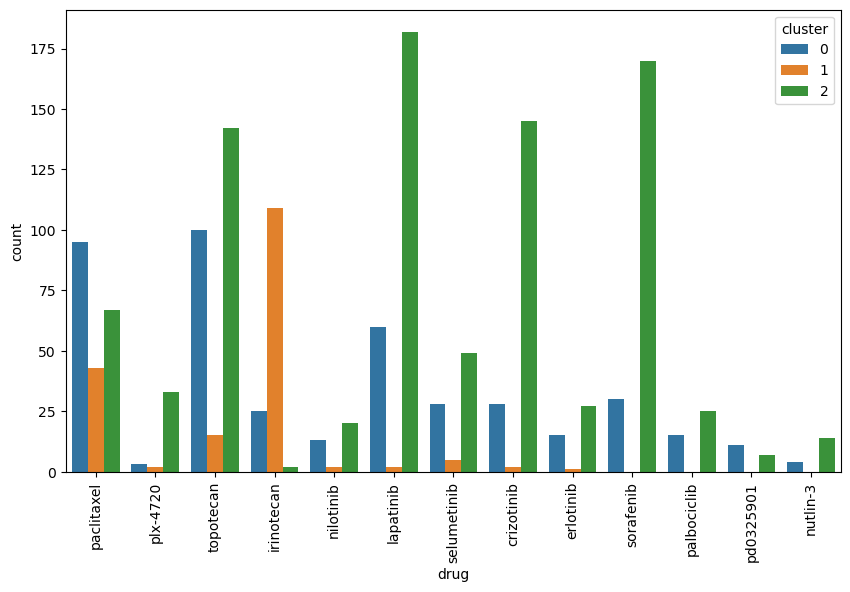

In [204]:
cluster_counts = data.groupby(['drug', 'cluster']).size().reset_index(name='counts')


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='drug', hue='cluster', data=data)
plt.xticks(rotation=90) 
plt.show()


In [106]:
# Import necessary libraries
import pandas as pd
import umap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# Subset the data to include only numeric variables
numeric_vars = ['ABC', 'density_diff']
data_numeric = data[numeric_vars]

# Handle missing values if necessary
# For example, here we fill missing values with the median of the respective column
data_numeric = data_numeric.fillna(data_numeric.median())

# Normalize the numeric data
scaler = MinMaxScaler()
data_numeric_scaled = scaler.fit_transform(data_numeric)

# Perform UMAP on the numeric data
umap_results = umap.UMAP(random_state=0, n_neighbors = 60, min_dist = 0.1).fit_transform(data_numeric_scaled)

# Add the UMAP components to the data frame
data['UMAP-2d-one'] = umap_results[:,0]
data['UMAP-2d-two'] = umap_results[:,1]




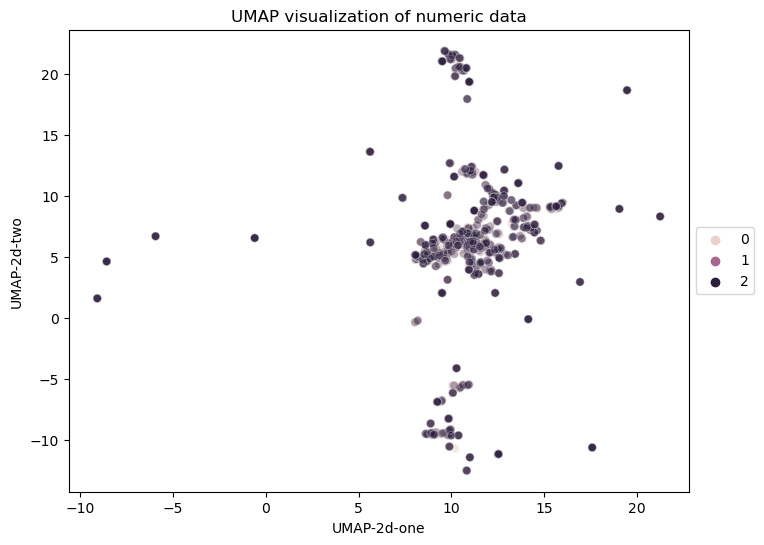

In [222]:
# Visualize the UMAP components, colored by 'Site.Primary' value
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="UMAP-2d-one", y="UMAP-2d-two",
    hue="cluster",
    data=data,
    alpha=0.3
)

plt.title('UMAP visualization of numeric data')
# Move the legend to an empty part of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [109]:
ccle_expression = pd.read_csv("../CCLe_expression_count-matrix.csv", index_col=0)
gdsc_expression = pd.read_csv("../GDSC2_expression_count-matrix.csv", index_col=0)

In [125]:
df1 = ccle_expression.copy()

# Step 1: Compute the standard deviation (or variance) for each gene
df1_std = df1.std(axis=1)

# Step 2: Select the top 1000 most variable genes
top_genes = df1_std.nlargest(1000).index

# Step 3: Filter df1 to keep only the top 1000 most variable genes
df1_filtered = df1.loc[top_genes]

df1_filtered.head()


,CVCL_0218,CVCL_0291,CVCL_0320,CVCL_1311,CVCL_0504,CVCL_5031,CVCL_5044,CVCL_5058,CVCL_1708,CVCL_1247,...,CVCL_1871,CVCL_1870,CVCL_0401,CVCL_2765,CVCL_2416,CVCL_1099,CVCL_1989,CVCL_1040,CVCL_1545,CVCL_3567
KRT19,12.789670,13.331561,13.316133,14.114660,4.700582,12.750842,12.974649,13.306501,12.463557,13.292631,...,3.731321,4.031149,3.716648,5.652607,12.086976,NaN,3.876151,6.766688,5.752748,14.118445
EPCAM,13.275333,12.655924,13.120116,5.560376,9.000046,12.347256,13.445182,12.878997,13.068420,10.860329,...,3.954098,5.821781,3.532810,3.985000,12.442232,NaN,5.445941,3.831240,3.841962,13.043221
MAL2,11.650229,12.002279,13.229817,4.946336,4.435847,11.952831,12.367402,12.511582,12.584002,11.513461,...,4.206594,4.001973,4.011698,4.752560,10.784741,NaN,12.652856,4.590228,4.835592,13.376396
TGFBI,11.386708,5.392017,9.487105,11.189465,5.213771,4.959348,10.586947,8.641608,12.357561,12.061549,...,3.988439,4.541322,14.657390,8.528105,4.570831,NaN,4.869383,11.493214,13.222405,11.027920
VIM,4.928293,7.421137,5.455084,13.999375,8.872945,5.546218,5.353489,5.712627,4.794370,10.696847,...,10.393979,8.867250,14.106983,14.508466,4.063776,NaN,13.290199,14.472099,13.946630,6.315021


In [126]:
# Assuming df1 is your first dataframe, transpose it to get genes as columns
ccle_exp_t = df1_filtered.transpose()

# Next, reset index to make sure 'cell lines' becomes a normal column
ccle_exp_t.reset_index(level=0, inplace=True)

# Rename 'index' to 'cell_line' to match with the second dataframe
ccle_exp_t = ccle_exp_t.rename(columns={'index': 'cell_line'})

# Convert cell_line to lowercase to match with second dataframe
ccle_exp_t['cell_line'] = ccle_exp_t['cell_line'].str.lower()

In [127]:
# Merge dataframes
result_df = pd.merge(data, ccle_exp_t, how='left', on='cell_line')
result_df.head()


,drug,cell_line,auc_ccle,auc_gdsc,ABC,SEEDING_DENSITY,density_ccle,density_diff,Site.Primary,Histology,...,RUNX3,BEND4,LONRF2,FGF2,MAL,ENO2,SHROOM3,KCNJ2,CPS1,PPP1R14C
0,paclitaxel,cvcl_0218,0.504732,0.116565,0.724886,700.0,250,450.0,large_intestine,carcinoma,...,5.732478,3.544781,3.874106,4.346202,4.349961,6.802773,7.916378,7.998229,4.204590,4.856610
1,paclitaxel,cvcl_1818,0.190757,0.056999,0.690144,2000.0,250,1750.0,haematopoietic_and_lymphoid_tissue,lymphoid_neoplasm,...,8.126034,7.947523,3.817284,6.035008,5.059317,6.948859,5.548433,4.473009,4.113684,4.341330
2,paclitaxel,cvcl_0077,0.455321,0.057515,0.625778,300.0,250,50.0,liver,carcinoma,...,6.192817,8.726171,4.830780,5.862779,4.705946,6.834737,5.475756,3.863655,4.417507,7.863433
3,paclitaxel,cvcl_1823,0.594915,0.092776,0.595331,2500.0,250,2250.0,haematopoietic_and_lymphoid_tissue,lymphoid_neoplasm,...,7.745744,3.425236,3.551976,4.167621,4.406495,6.243832,8.218433,4.188090,4.079920,7.851442
4,plx-4720,cvcl_1694,0.687441,0.148596,0.584298,625.0,250,375.0,haematopoietic_and_lymphoid_tissue,haematopoietic_neoplasm,...,6.148005,3.672178,3.919630,5.267020,4.514911,7.891463,4.521777,4.758651,4.346745,4.821679


In [128]:
# Get the 4th, 6th and all columns after the 13th
data_numeric = result_df.iloc[:, [4, 7] + list(range(15, result_df.shape[1]))]
data_numeric

,ABC,density_diff,KRT19,EPCAM,MAL2,TGFBI,VIM,GJA1,SRGN,CAV1,...,RUNX3,BEND4,LONRF2,FGF2,MAL,ENO2,SHROOM3,KCNJ2,CPS1,PPP1R14C
0,0.724886,450.0,12.789670,13.275333,11.650229,11.386708,4.928293,3.607577,3.878678,8.689309,...,5.732478,3.544781,3.874106,4.346202,4.349961,6.802773,7.916378,7.998229,4.204590,4.856610
1,0.690144,1750.0,4.015373,5.023027,3.919136,3.980788,12.680265,3.504740,12.510277,9.547108,...,8.126034,7.947523,3.817284,6.035008,5.059317,6.948859,5.548433,4.473009,4.113684,4.341330
2,0.625778,50.0,4.099210,5.884512,4.572907,4.856550,14.014973,12.996564,3.677157,6.469414,...,6.192817,8.726171,4.830780,5.862779,4.705946,6.834737,5.475756,3.863655,4.417507,7.863433
3,0.595331,2250.0,3.420615,9.822577,4.116887,10.941319,12.261439,6.775729,12.390854,11.667009,...,7.745744,3.425236,3.551976,4.167621,4.406495,6.243832,8.218433,4.188090,4.079920,7.851442
4,0.584298,375.0,4.661338,3.762382,4.010580,7.256661,12.683227,11.682469,13.506150,5.037525,...,6.148005,3.672178,3.919630,5.267020,4.514911,7.891463,4.521777,4.758651,4.346745,4.821679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486,0.017840,150.0,3.874395,3.861342,4.325371,4.853195,13.732933,4.215409,12.208987,11.862093,...,8.213052,8.546939,3.758554,4.603428,11.353409,10.304682,4.927723,5.343989,4.004395,5.724519
1487,0.017106,112.5,3.986913,4.117377,4.160394,13.971420,14.027729,10.638756,11.860921,13.141978,...,4.812222,3.545730,4.555200,8.439281,4.608390,7.449657,5.138970,4.359607,7.821048,4.365356
1488,0.011869,50.0,3.465010,4.264818,3.866694,5.187842,13.962523,3.626032,8.128991,9.969224,...,9.414453,3.471668,6.719782,4.277125,4.659188,9.019727,4.908932,5.150856,6.369201,8.592351
1489,0.011869,50.0,3.465010,4.264818,3.866694,5.187842,13.962523,3.626032,8.128991,9.969224,...,9.414453,3.471668,6.719782,4.277125,4.659188,9.019727,4.908932,5.150856,6.369201,8.592351


In [177]:
# Import necessary libraries
import pandas as pd
import umap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


data_numeric = result_df.iloc[:, [4, 7] + list(range(15, result_df.shape[1]))]

# Handle missing values if necessary
# For example, here we fill missing values with the median of the respective column
data_numeric = data_numeric.fillna(data_numeric.median())

# Normalize the numeric data
scaler = MinMaxScaler()
data_numeric_scaled = scaler.fit_transform(data_numeric)

# Perform UMAP on the numeric data
umap_results = umap.UMAP(random_state=0, n_neighbors = 80, min_dist = 0.3).fit_transform(data_numeric_scaled)

# Add the UMAP components to the data frame
result_df['UMAP-2d-one'] = umap_results[:,0]
result_df['UMAP-2d-two'] = umap_results[:,1]



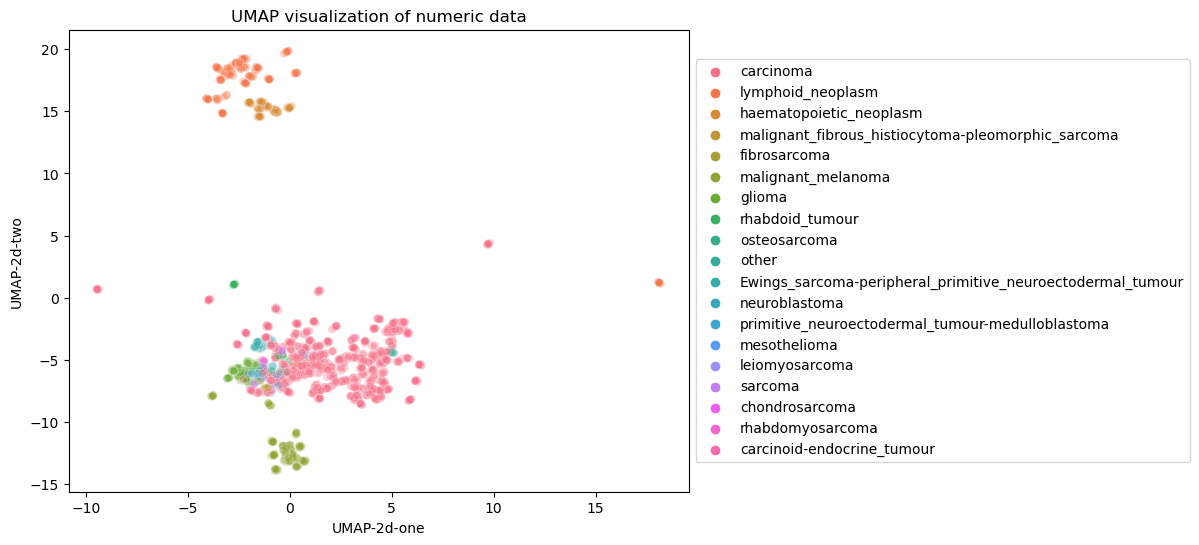

In [223]:
# Visualize the UMAP components, colored by 'Site.Primary' value
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="UMAP-2d-one", y="UMAP-2d-two",
    hue="Histology",
    data=result_df,
    alpha=0.3
)

plt.title('UMAP visualization of numeric data')
# Move the legend to an empty part of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()